# Введение
Подключение необходимых библиотек

In [52]:
import pandas as pd
import numpy as np

In [53]:
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
events_data = pd.read_csv("event_data_train.csv")
submissions = pd.read_csv("submissions_data_train.csv")

In [55]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [56]:
submissions.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


## преобразование исходных данных

In [57]:
events_data["date"] = pd.to_datetime(events_data["timestamp"],unit='s')
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [58]:
events_data['day']=events_data['date'].dt.date
events_data.head(10)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15


In [59]:
submissions["date"] = pd.to_datetime(submissions['timestamp'],unit="s")
submissions["day"] = submissions["date"].dt.date
submissions.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


# Анализ данных

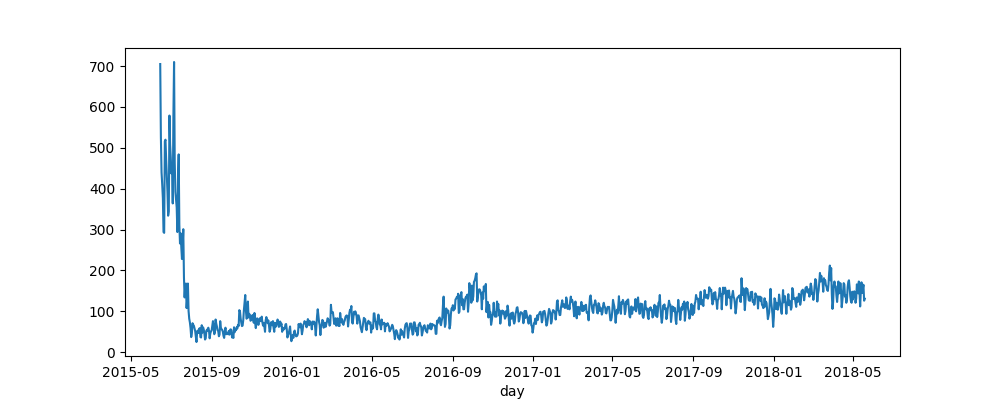

In [60]:
fig,ax = plt.subplots(figsize=(10,4))

day_users = events_data.groupby("day").user_id.nunique().plot(ax = ax)

## Подсчет участников с исползованием pivot таблиц

[]

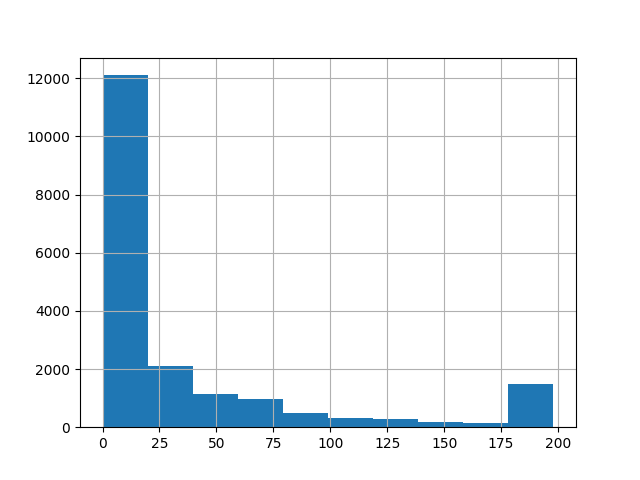

In [61]:
fig, ax = plt.subplots()
ax = events_data.pivot_table(index="user_id",columns="action",values="step_id",aggfunc="count",fill_value=0).discovered.hist()

ax.plot()

In [62]:
users_event_data = events_data.pivot_table(index='user_id',
                                           columns="action",
                                           values="step_id",
                                           fill_value=0,
                                           aggfunc="count").reset_index()
users_event_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [63]:
users_score = submissions.pivot_table(index="user_id", 
                             columns="submission_status", 
                             values="step_id", 
                             aggfunc="count", 
                             fill_value=0).reset_index()

users_score.head()


submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


## Определение участников "выпавших из курса"

In [64]:
events_data[["user_id","day","timestamp"]] \
    .drop_duplicates(subset=["user_id","day"]).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [65]:
date_gap =( events_data[["user_id","day","timestamp"]]
    .drop_duplicates(subset=["user_id","day"])
    .groupby("user_id")["timestamp"]
    .agg(list)
    .transform(np.diff)
)
date_gap.values

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)],
      shape=(19234,), dtype=object)

In [66]:
date_gap = pd.Series(np.concatenate(date_gap.values, axis = 0)) / (24*60*60)
date_gap.head()

0    56.060208
1    79.852419
2     2.112083
3     1.084606
4    32.047106
dtype: float64

<Axes: >

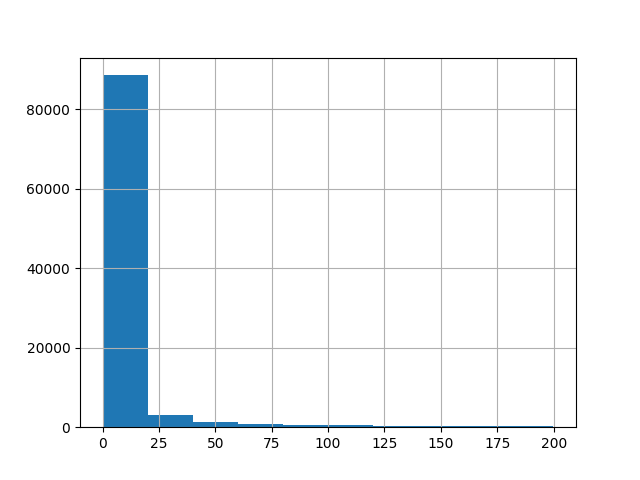

In [67]:
fig, ax = plt.subplots()

date_gap[date_gap<200].hist(ax=ax)


In [68]:
date_gap.quantile(0.90)

np.float64(18.325995370370403)

In [69]:
drop_out_timestamp = date_gap.quantile(0.90) *24*60*60
now = events_data.timestamp.max()

In [70]:
users_data = events_data.groupby("user_id", as_index=False).agg({"timestamp":"max"}).rename(columns={"timestamp":"last_timestamp"})
users_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [71]:
users_data["is_gone"] = (now - users_data["last_timestamp"]) > drop_out_timestamp
users_data.head()

,user_id,last_timestamp,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [72]:
users_data = users_data.merge(users_score,how="outer").fillna(0)

users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [73]:
users_data = users_data.merge(users_event_data, how="outer")
users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [86]:
users_data["is_passed"] = users_data.passed > 175

users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,is_passed
0,1,1472827464,True,0.0,0.0,1,0,0,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,False


In [87]:
users_data.groupby("is_passed").count()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
is_passed,,,,,,,,,
False,17844,17844,17844,17844,17844,17844,17844,17844,17844
True,1390,1390,1390,1390,1390,1390,1390,1390,1390


In [ ]:
users_data.user_id.nunique()

19234

In [94]:
events_data.user_id.nunique()

19234

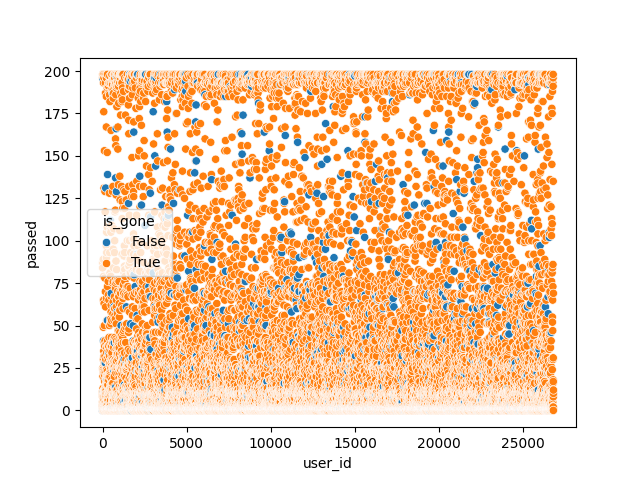

In [92]:
fig, ax = plt.subplots()

ax = sns.scatterplot(users_data, x= "user_id", y = "passed", hue = "is_gone")